In [1]:
import correctionlib
import rich
import vector
import awkward as ak
import dask_awkward as dak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import mplhep as hep
import matplotlib.pyplot as plt
plt.style.use(hep.style.CMS)
import numpy as np

# ceval = correctionlib.CorrectionSet.from_file("puWeights.json.gz")
# list(ceval.keys())
# ceval[key].inputs

# rich.print(ceval[key])

In [6]:
def plotRelErr(rel_err, weights, var_name, sample):
    binning_map = {
        # "rel_err" : [1e-7, 0.001, 31],
        # "rel_err" : [-7, -3, 31],
        "rel_err" : [0, 99, 100],
    }
    fig, ax_main = plt.subplots()
    binning = np.linspace(*binning_map["rel_err"])
    drop_zeros = rel_err != 0
    print(f"drop_zeros: {np.sum(drop_zeros)}")
    print(f"len(drop_zeros): {len(drop_zeros)}")
    rel_err = rel_err[drop_zeros]
    weights = weights[drop_zeros]
    rel_err_hist, edges = np.histogram(rel_err, bins=binning, weights = weights)
    rel_err_hist_w2, edges = np.histogram(rel_err, bins=binning, weights = weights*weights)
    # rel_err_hist, edges = np.histogram(rel_err, bins=binning, )
    # rel_err_hist_w2, edges = np.histogram(rel_err, bins=binning, )
    
        
    hep.histplot(
        rel_err_hist, 
        bins=binning, 
        histtype='errorbar', 
        label=f"{var_name}", 
        xerr=True, 
        yerr=np.sqrt(rel_err_hist_w2),
        color = "blue",
        ax=ax_main
    )
    
    ax_main.set_xlabel("Relative Error")
    # ax_main.set_xscale('log')
    plt.title(f"Relative Error of {sample} {var_name}")
    plt.legend(loc="center right")
    plt.show()
    plt.clf()

In [25]:
ceval[key].evaluate(2.0,"nominal")

126.28474497830182

In [28]:
ceval[key].evaluate(-1.0,"nominal")

999.6257585870084

In [34]:



file_dict = {"/eos/purdue/store/mc/Run3Summer22NanoAODv12/GluGluHto2Mu_M-125_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_v5-v3/50000/f5f23b40-7769-49c3-81ad-3fc659398887.root": {"object_path": "Events", "steps": [[0, 2840]], "uuid": "b16b5dea-fbcd-11ed-bae7-a2a0b8bcbeef"}}
# file_dict = {"/eos/purdue/store/mc/Run3Summer22NanoAODv12/GluGluHto2Mu_M-125_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_v5-v3/50000/f5f23b40-7769-49c3-81ad-3fc659398887.root": {"object_path": "Events", "steps": [[0, 28400]], "uuid": "b16b5dea-fbcd-11ed-bae7-a2a0b8bcbeef"}}


ggh_events = NanoEventsFactory.from_root(
    file_dict,
    schemaclass=NanoAODSchema,
).events()

# file_dict = {"dy_M-50To120": {"files": {"/eos/purdue/store/mc/Run3Summer22NanoAODv12/DYto2Mu_MLL-50to120_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_v5-v2/2520000/de75fafc-e5fa-4f3d-8c91-634b9e13407b.root": {"object_path": "Events", "steps": [[0, 743]], "num_entries": 743, "uuid": "bdcc516c-6413-11ee-a9b6-118ed380beef"}}, "form": None, "metadata": {"sumGenWgts": 31483838.0744, "nGenEvts": 1453748, "data_entries": None, "fraction": 1.0, "original_fraction": 1.0, "is_mc": True, "dataset": "dy_M-120To200"}}}
file_dict = {"/eos/purdue/store/mc/Run3Summer22NanoAODv12/DYto2Mu_MLL-50to120_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_v5-v2/2520000/de75fafc-e5fa-4f3d-8c91-634b9e13407b.root": {"object_path": "Events", "steps": [[0, 743]], "uuid": "b16b5dea-fbcd-11ed-bae7-a2a0b8bcbeef"}}

dy_events = NanoEventsFactory.from_root(
    file_dict,
    schemaclass=NanoAODSchema,
).events()


In [3]:
dy_events.Pileup.fields

['nPU', 'sumEOOT', 'sumLOOT', 'nTrueInt', 'pudensity', 'gpudensity']

In [4]:
NumTrueInteractions = ggh_events.Pileup.nTrueInt.compute()
print(ak.max(NumTrueInteractions))
print(ak.min(NumTrueInteractions))
#NumTrueInteractions

63.125
11.40625


In [17]:
ceval = correctionlib.CorrectionSet.from_file("puWeights.json.gz")
key = list(ceval.keys())[0]
pu_lookup = ceval[key]
correctedNum_wgt = pu_lookup.evaluate(NumTrueInteractions,"nominal")
correctedNum_wgt_delayed = pu_lookup.evaluate(ggh_events.Pileup.nTrueInt,"nominal")

In [18]:
ak.all(ak.isclose(correctedNum_wgt, correctedNum_wgt_delayed.compute()))

True

In [ ]:
weights = correctedNum_wgt/ ak.sum(correctedNum_wgt)
plotRelErr(NumTrueInteractions, weights, "NumTrueInteractions", "ggH")

In [ ]:
weights = correctedNum_wgt/ ak.sum(correctedNum_wgt)
nPVs = ggh_events.PV.npvs.compute()
plotRelErr(nPVs, weights, "Number of primary vertices", "ggH")


In [ ]:
nPVs = ggh_events.PV.npvs.compute()
weights = nPVs/ ak.sum(nPVs)
plotRelErr(nPVs, weights, "Number of primary vertices b4 weights", "ggH")


In [ ]:

file_dict = {"/eos/purdue/store/data/Run2022C/Muon/NANOAOD/16Dec2023-v1/2550000/019b0054-1684-410d-9fb2-837f92da4956.root": {"object_path": "Events", "steps": [[0, 102577]], "uuid": "b16b5dea-fbcd-11ed-bae7-a2a0b8bcbeef"}}

data_events = NanoEventsFactory.from_root(
    file_dict,
    schemaclass=NanoAODSchema,
).events()
# NumTrueInteractions_data = data_events.Pileup.nTrueInt.compute()
# weights = ak.ones_like(NumTrueInteractions_data)
# weights = weights / ak.sum(weights)
# plotRelErr(NumTrueInteractions_data, weights, "NumTrueInteractions", "data C")

nPVs = data_events.PV.npvs.compute()
weights = ak.ones_like(nPVs)
weights = weights / ak.sum(weights)
plotRelErr(nPVs, weights, "Number of primary vertices", "data")

In [36]:
def plotPUWgt(input_dict):
    binning_map = {
        # "value" : [1e-7, 0.001, 31],
        # "value" : [-7, -3, 31],
        "value" : [0, 99, 100],
    }
    fig, ax_main = plt.subplots()
    binning = np.linspace(*binning_map["value"])
    for sample, sample_dict in input_dict.items():
        value = sample_dict["value"]
        weights = sample_dict["weights"]
        drop_zeros = value != 0
        print(f"drop_zeros: {np.sum(drop_zeros)}")
        print(f"len(drop_zeros): {len(drop_zeros)}")
        value = value[drop_zeros]
        weights = weights[drop_zeros]
        rel_err_hist, edges = np.histogram(value, bins=binning, weights = weights)
        rel_err_hist_w2, edges = np.histogram(value, bins=binning, weights = weights*weights)
        
            
        hep.histplot(
            rel_err_hist, 
            bins=binning, 
            histtype='errorbar', 
            label=sample, 
            xerr=True, 
            yerr=np.sqrt(rel_err_hist_w2),
            ax=ax_main
        )
        
        ax_main.set_xlabel("Number of Primary Vertices")
        ax_main.set_ylabel("Arbitrary Unit")
    plt.title(f"Quick Sanity Check of PU re-weight")
    plt.legend(loc="upper right")
    plt.show()
    plt.clf()

drop_zeros: 2840
len(drop_zeros): 2840
drop_zeros: 2840
len(drop_zeros): 2840
drop_zeros: 102577
len(drop_zeros): 102577


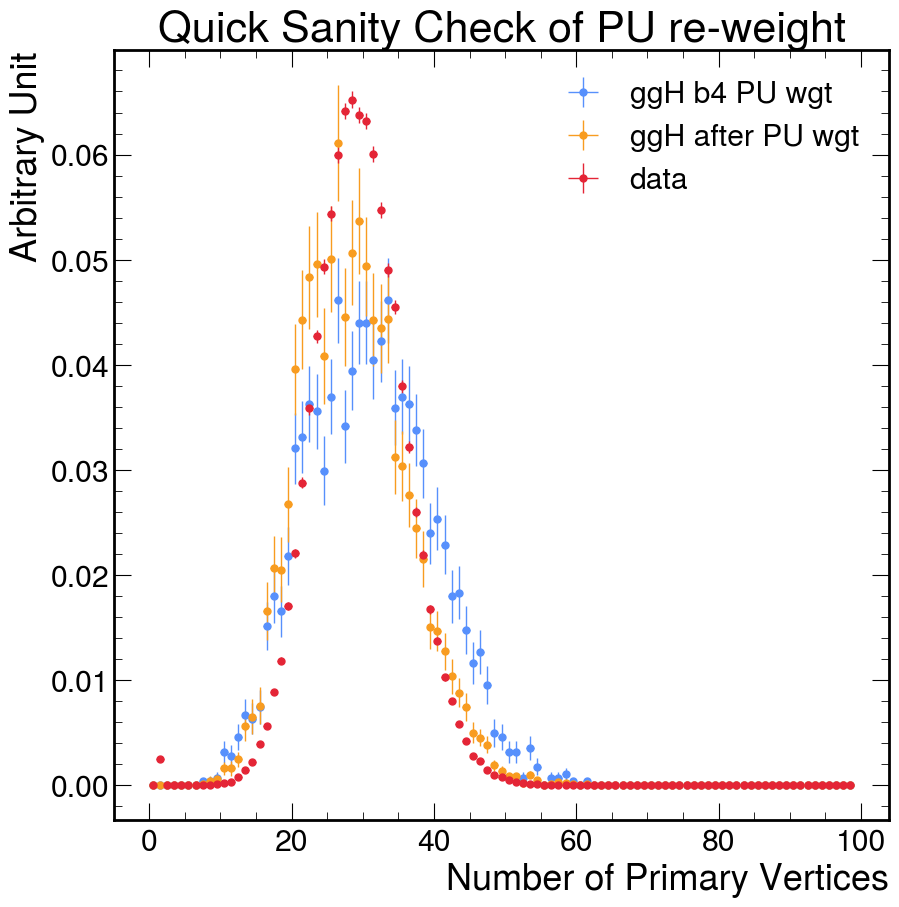

<Figure size 1000x1000 with 0 Axes>

In [37]:
input_dict = {}

nPVs = ggh_events.PV.npvs.compute()
weights = ak.ones_like(nPVs)
weights = weights / ak.sum(weights)
ggh_b4_dict =  {
    "value": nPVs,
    "weights": weights,
}
input_dict["ggH b4 PU wgt"] = ggh_b4_dict

nPVs = ggh_events.PV.npvs.compute()
NumTrueInteractions = ggh_events.Pileup.nTrueInt.compute()
ceval = correctionlib.CorrectionSet.from_file("puWeights.json.gz")
key = list(ceval.keys())[0]
pu_lookup = ceval[key]
weights = pu_lookup.evaluate(NumTrueInteractions,"nominal")
weights = weights / ak.sum(weights)
ggh_after_dict =  {
    "value": nPVs,
    "weights": weights,
}
input_dict["ggH after PU wgt"] = ggh_after_dict

nPVs = data_events.PV.npvs.compute()
weights = ak.ones_like(nPVs)
weights = weights / ak.sum(weights)
data_dict =  {
    "value": nPVs,
    "weights": weights,
}
input_dict["data"] = data_dict





plotPUWgt(input_dict)

In [49]:
# ak.max(correctedNumTrueInteractions)
ak.min(correctedNumTrueInteractions)

0.1724341778238752

In [12]:
data_events.fields

['bunchCrossing',
 'OtherPV',
 'L1Reco',
 'Rho',
 'L1',
 'SoftActivityJetHT10',
 'DST',
 'Dataset',
 'FatJet',
 'BeamSpot',
 'L1EtSum',
 'L1Mu',
 'ChsMET',
 'PV',
 'boostedTau',
 'HLTriggerFirstPath',
 'CorrT1METJet',
 'L1EG',
 'IsoTrack',
 'SoftActivityJet',
 'TkMET',
 'Muon',
 'PuppiMET',
 'SV',
 'luminosityBlock',
 'HLTriggerFinalPath',
 'FsrPhoton',
 'Photon',
 'CaloMET',
 'Flag',
 'event',
 'SoftActivityJetHT2',
 'LowPtElectron',
 'MET',
 'HLT',
 'SoftActivityJetNjets5',
 'DeepMETResponseTune',
 'Electron',
 'DeepMETResolutionTune',
 'L1Jet',
 'SubJet',
 'L1Tau',
 'SoftActivityJetHT5',
 'run',
 'TrigObj',
 'TauProd',
 'Tau',
 'SoftActivityJetNjets2',
 'Jet',
 'RawMET',
 'RawPuppiMET',
 'Proton',
 'SoftActivityJetHT',
 'PPSLocalTrack',
 'SoftActivityJetNjets10']

In [14]:
data_events.run.compute()

<Array [356446, 356446, ..., 356446, 356446] type='102577 * uint32[paramete...'>

In [16]:
import awkward as ak

A = ak.Array([1,3])
ak.ones_like(A, dtype="bool")

<Array [True, True] type='2 * bool'>